In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


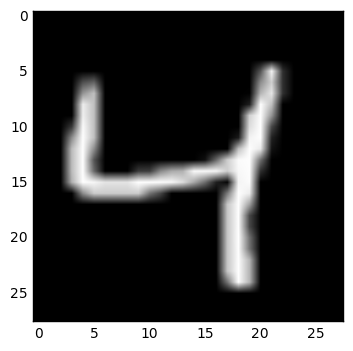

In [4]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')
plt.show()

In [37]:
## defining models 

# input and output
x = tf.placeholder(dtype=tf.float32, shape=[None, 784])
y_ = tf.placeholder(dtype=tf.float32, shape=[None, 784])

# encode layer
encoding_dim = 32
W1 = tf.Variable(tf.truncated_normal([784, encoding_dim], stddev=0.1))
b1 = tf.Variable(tf.constant(0.1, shape=[encoding_dim]))
y = tf.matmul(x, W1) + b1
encoded = tf.nn.relu(y)

# output layer
W2 = tf.Variable(tf.truncated_normal([encoding_dim, 784], stddev=0.1))
b2 = tf.Variable(tf.constant(0.1, shape=[784]))
logits = tf.matmul(encoded, W2) + b2

# sigmoid output from logits
decoded = tf.sigmoid(logits)

# loss function 
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_, logits=logits)
cross_entropy = tf.reduce_mean(loss)

# optimizer
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

In [38]:
## Training 
sess = tf.Session()

sess.run(tf.global_variables_initializer())
for i in range(20000):
    batch = mnist.train.next_batch(200)
    batch_cost, _ = sess.run([cross_entropy, train_step], 
                             feed_dict={x: batch[0], y_: batch[0]})

    if i%200 == 0:
        print(batch_cost)

0.737666
0.413741
0.291239
0.281064
0.25606
0.242504
0.232201
0.221026
0.207798
0.203523
0.192942
0.186298
0.180846
0.171046
0.171848
0.16869
0.166236
0.162281
0.156423
0.151089
0.14958
0.148155
0.145527
0.140823
0.139801
0.132698
0.131838
0.137262
0.131313
0.13022
0.12622
0.120841
0.119786
0.126542
0.126472
0.123592
0.121917
0.124456
0.118721
0.115104
0.115518
0.116115
0.115339
0.11262
0.114713
0.107923
0.10756
0.107781
0.111936
0.106749
0.110271
0.108046
0.108921
0.105611
0.107406
0.106362
0.105032
0.103475
0.102356
0.105926
0.104512
0.105756
0.105595
0.100106
0.102102
0.101293
0.10598
0.103655
0.10215
0.0990439
0.0987426
0.0998648
0.100032
0.0990974
0.098979
0.0936608
0.101003
0.0974073
0.0978022
0.0981605
0.0960306
0.0984785
0.0954046
0.0961356
0.0997439
0.101711
0.0929871
0.0973339
0.0965029
0.0994669
0.0977586
0.0988856
0.0983369
0.0933598
0.0982299
0.094606
0.095063
0.0983007
0.0958059
0.096042


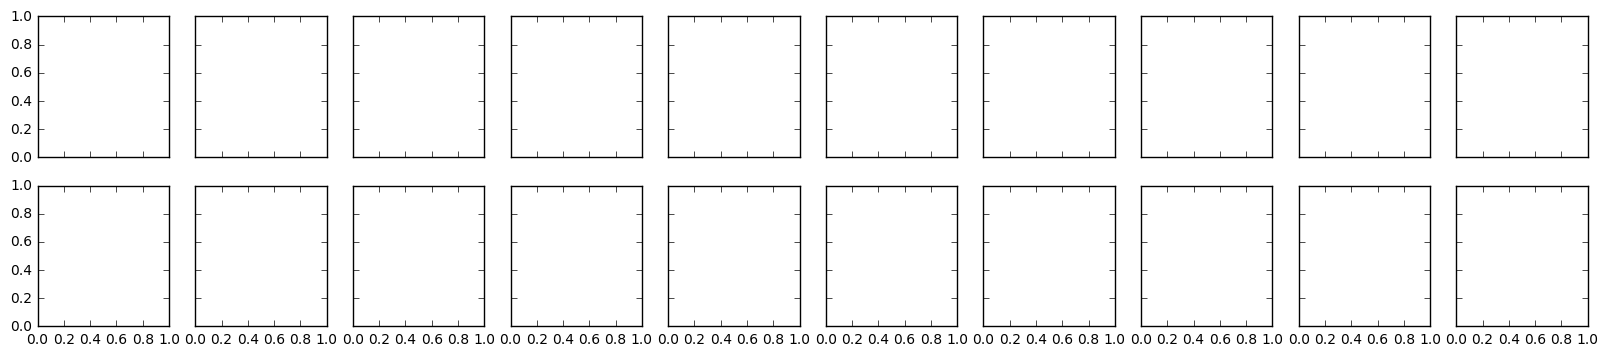

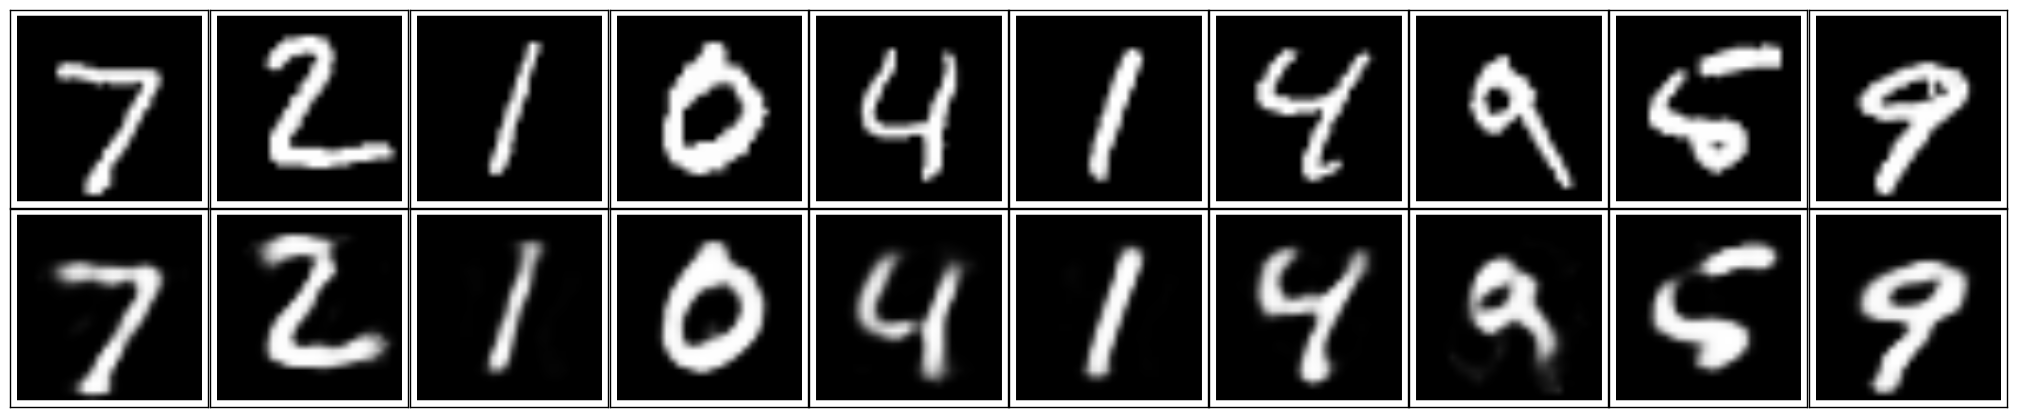

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={x: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.plot()

fig.tight_layout(pad=0.1)
plt.show()